# Object detection using Transfer Learning

This dataset contains images of objects belonging to 101 categories ranging from accordion, airplanes to windows, chairs, wrenches. Each category has a number of images ranging from 40 to 800 and the total dataset size is 9,100 images. Many categories have around 50 images and the size of each image is roughly 300 x 200*3 pixels.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os
from imutils import paths
import time

# Check device 

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
 physical_devices = tf.config.experimental.list_physical_devices('GPU')
 print("Num of GPUs available: ",len(physical_devices))
 tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num of GPUs available:  1


# Load images

In [4]:
categories = list(os.walk("C:/Users/Nishant S/OneDrive/Desktop/ML/CPU vs GPU/caltech-101/101_ObjectCategories"))

In [5]:
categories = categories[0]

In [6]:
classes = []
for category in categories[1]:
    classes.append(category)

In [7]:
#the 101 classes
classes

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'BACKGROUND_Google',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

In [10]:
print("Number of Classes is: " + str(len(classes)))

Number of Classes is: 102


In [11]:
imagePaths = "C:/Users/Nishant S/OneDrive/Desktop/ML/CPU vs GPU/caltech-101/101_ObjectCategories"

In [23]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.2)\
    .flow_from_directory(directory=imagePaths, shuffle=True, seed =42, target_size=(224,224), classes=classes, batch_size=4)

Found 9144 images belonging to 102 classes.


# Plot images

In [13]:
imgs,labels = next(train_batches)

In [14]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


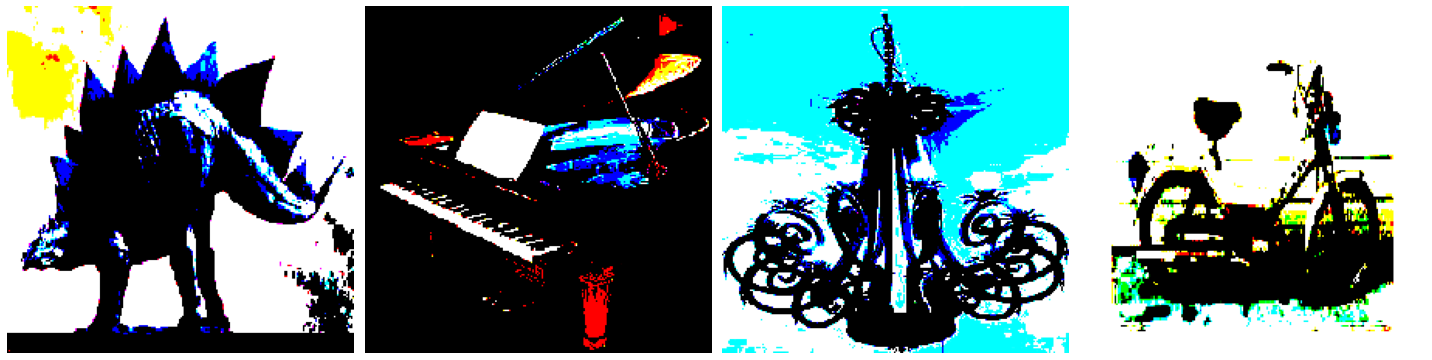

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [15]:
plotImages(imgs)
print(labels)

# VGG 

Transfer learning is a technique wherein a pretrained model 
which is built to work on a variety of datasets is adopted. Only 
the last few layers of the model are altered and trained for the 
specific intended objective. VGG model is chosen as the base model for transfer learning

In [16]:
img_shape=imgs[0].shape

In [17]:
vgg = VGG16()
#print(model.summary())

In [18]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Model

In [19]:
#create a sequential model object
model = Sequential()

#The last two layers are not selected
for layer in vgg.layers[:-2]:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False

#Two custom layers are added
model.add(Dense(512, activation="relu"))
model.add(Dense(102, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [21]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
#model training
with tf.device('/device:GPU:0'):
    model.fit(x=train_batches,
            epochs=1,
            verbose=1)

2286/2286 [==============================] - 218s 95ms/step - loss: 1.2444 - accuracy: 0.7718


# Prediction

In [25]:
img, labels = train_batches[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


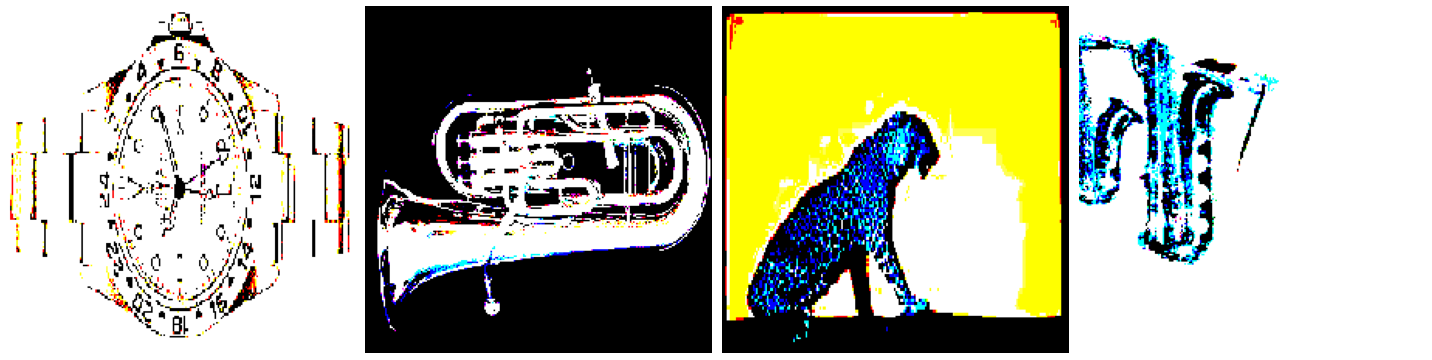

In [28]:
plotImages(img)

In [30]:
var1 = model.predict(img)

1/1 [==============================] - 0s 136ms/step


In [31]:
res = []
for i in range(len(var1)):
    res.append(np.argmax(var1[i]))

In [36]:
for i in range(len(res)):
    print("The image belongs to class : " + classes[res[i]])

The image belongs to class : watch
The image belongs to class : euphonium
The image belongs to class : Leopards
The image belongs to class : euphonium


## Results

In [ ]:
# full_gpu = []
# for i in range(3, 8):
    
#     model = Sequential()
#     for layer in vgg.layers[:-2]:
#         model.add(layer)
    
#     for layer in model.layers:
#         layer.trainable = False

#     model.add(Dense(512, activation="relu"))
#     model.add(Dense(102, activation="softmax"))
#     model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
    
#     train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.1)\
#     .flow_from_directory(directory=imagePaths, shuffle=True, seed =42, target_size=(224,224), classes=classes, batch_size=4)
    
#     temp = time.time()
#     with tf.device('/device:GPU:0'):
#         model.fit(x=train_batches,
#             epochs=1,
#             verbose=1)
#     full_gpu.append(time.time()-temp)

In [ ]:
# [149.6570165157318,
#  131.71568965911865,
#  133.2319769859314,
#  131.93358087539673,
#  131.9352366924286]

In [ ]:
# cpu_size = [341.6385772228241, 476.7184028625488, 614.2421894073486, 741.0544340610504, 867.264895439148]

In [ ]:
# cpu_size

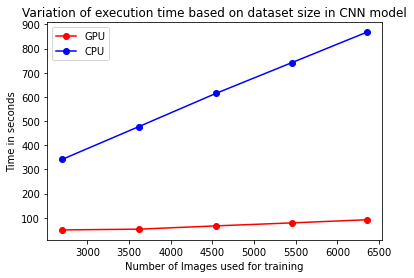

In [31]:
# x=[2700,3617,4543,5451,6352]
# plt.plot(x, gpu_size, color="red",marker="o")
# plt.plot(x, cpu_size, color="blue",marker="o")
# plt.legend(["GPU", "CPU"])
# plt.title("Variation of execution time based on dataset size in CNN model")
# plt.ylabel("Time in seconds")
# plt.xlabel("Number of Images used for training")
# plt.figsize = (10,6)
# plt.show()